In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
pseu_data = pd.read_csv("/home/Task/02_stable_reverse_gene_pair/pseu_tpm.csv",index_col=0)
pseu_data

,ARG2,TEX10,GALE,UNC5D,FBXL12,CUL5,SYK,FGD6,PLCL2,ZNF283,LPAR1,DHRS2
Alpha.Sample101,568766.009787,36396.078752,51136.915731,0.000000,73215.972908,100629.647438,56375.638892,4072.974062,44787.436415,26208.640697,22898.371823,15512.313495
Alpha.Sample102,620614.717281,18620.253851,63030.705066,0.000000,56421.259410,74294.248099,40837.442727,9494.878150,22449.012570,14337.411858,45373.713576,34526.357412
Alpha.Sample103,605070.562901,29352.437874,37246.354398,0.000000,59305.911375,90446.769065,27006.225472,9964.382075,67681.936761,4090.472112,31491.291858,38343.656109
Alpha.Sample104,545477.144406,56820.328885,55937.765447,0.000000,44388.692119,93793.399544,36909.528463,7892.318186,43584.890566,33267.440424,50933.993653,30994.498308
Alpha.Sample105,622403.828311,27073.369810,64530.529914,19.325439,71540.295394,62502.564212,30170.059916,6680.275657,42315.990352,7466.850599,30524.132723,34772.777672
Alpha.Sample106,679607.930903,35442.813226,26159.529175,0.000000,32535.619848,80761.125070,24786.444343,10751.899029,23599.666488,27236.619900,20839.168259,38279.183759
Alpha.Sample107,162523.033806,93376.705694,28290.856380,126.157203,175658.638603,142280.474960,50547.341037,60590.827547,130307.069467,10311.206332,123956.059911,22031.629059
Alpha.Sample108,472957.499192,44248.664757,99783.105997,0.000000,91727.078421,98034.302532,66332.414336,13557.964028,38039.062136,24977.178144,14001.793272,36340.937185
Alpha.Sample109,446557.959810,59837.499945,54588.125330,219.651192,89304.610059,109546.194183,72731.611130,18242.683228,64558.350482,14960.625301,46775.244415,22677.444924
Alpha.Sample110,212275.910674,53522.812236,78821.013148,0.000000,181538.934831,111125.043184,114968.773769,34740.976003,80433.567042,17792.266032,47722.666506,67058.036576


In [3]:
delta_data = pseu_data.filter(regex='.*Delta.*', axis=0)
zero_percent = delta_data.eq(0).mean()
keep_cols = zero_percent[zero_percent < 0.3].index
delta_data = delta_data[keep_cols]
delta_data = delta_data.T
nd_exp =  delta_data.iloc[:,0:6]
t2d_exp = delta_data.iloc[:,6:]

In [5]:
def scatter_plot(data,gene1,gene2,title):
    gene1_data = data.loc[gene1]
    gene2_data = data.loc[gene2]
    fig, ax = plt.subplots()
    ax.scatter(range(0,len(gene1_data)),gene1_data.values, label=gene1)
    ax.scatter(range(0,len(gene2_data)),gene2_data.values, label=gene2)
    for i in range(len(gene1_data) - 1):
        ax.plot([gene1_data.index[i], gene1_data.index[i + 1]], [gene1_data[i], gene1_data[i + 1]], color='grey',linestyle='--')
        ax.plot([gene2_data.index[i], gene2_data.index[i + 1]], [gene2_data[i], gene2_data[i + 1]], color='grey',linestyle='--')
    ax.legend()
    ax.set_xlabel('Samples')
    ax.set_ylabel('Expression Level')
    ax.set_title(title)
    ax.set_xticklabels([])
    ax.set_xticks([])
    ax.legend(loc="upper left")
    plt.show()

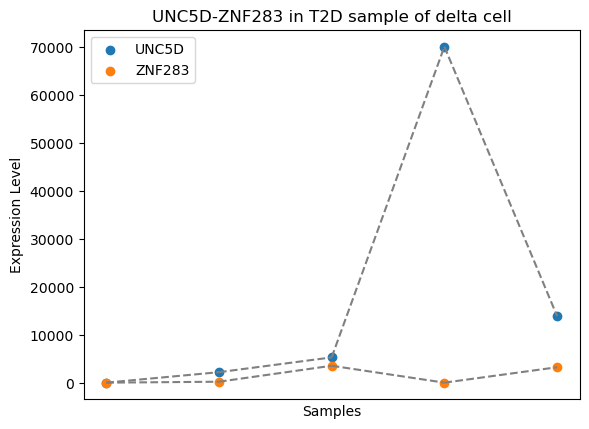

In [6]:
scatter_plot(t2d_exp,'UNC5D','ZNF283',"UNC5D-ZNF283 in T2D sample of delta cell")

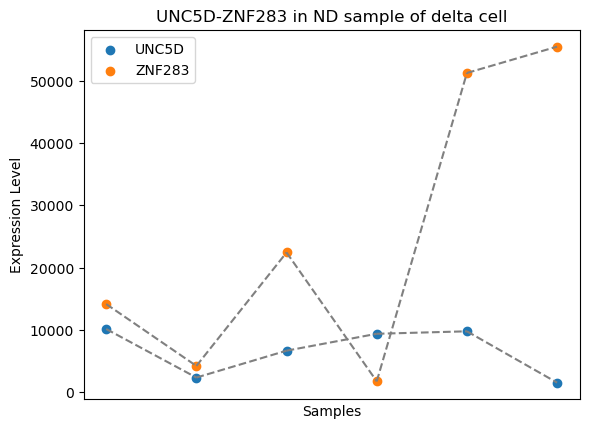

In [7]:
scatter_plot(nd_exp,'UNC5D','ZNF283',"UNC5D-ZNF283 in ND sample of delta cell")

In [8]:
GSE76894_train = pd.read_csv("/home/Task/02_stable_reverse_gene_pair/GSE76894_train_exp.csv",index_col=0)
GSE164416_train = pd.read_csv("/home/Task/02_stable_reverse_gene_pair/GSE164416_train_exp.csv",index_col=0)
GSE54279_train = pd.read_csv("/home/Task/02_stable_reverse_gene_pair/GSE54279_train_exp.csv",index_col=0)

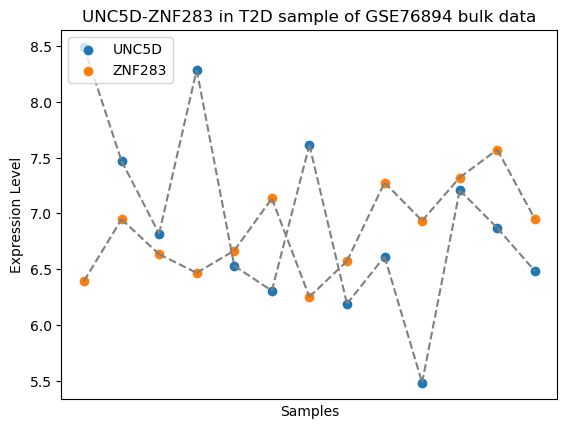

In [9]:
scatter_plot(GSE76894_train.iloc[:,0:13],'UNC5D','ZNF283',"UNC5D-ZNF283 in T2D sample of GSE76894 bulk data")

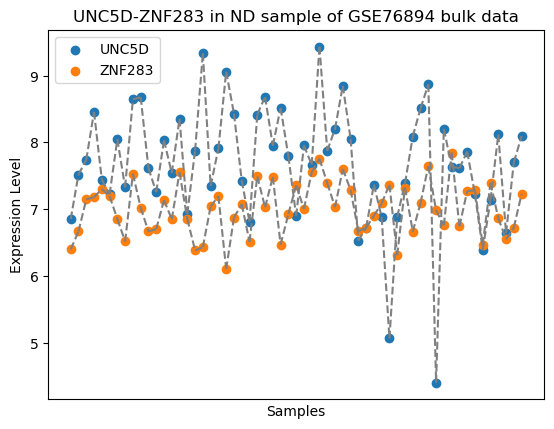

In [10]:
scatter_plot(GSE76894_train.iloc[:,13:],'UNC5D','ZNF283',"UNC5D-ZNF283 in ND sample of GSE76894 bulk data")

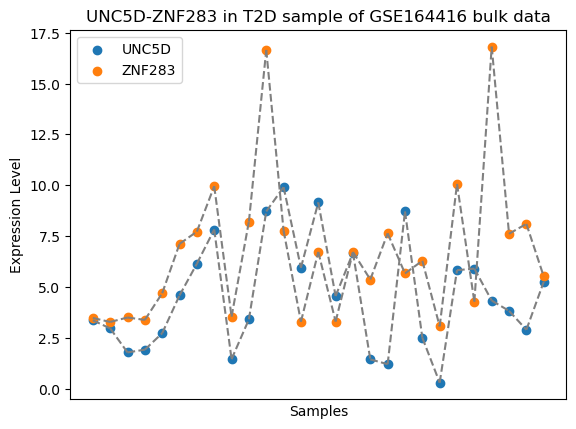

In [11]:
scatter_plot(GSE164416_train.iloc[:,0:27],'UNC5D','ZNF283',"UNC5D-ZNF283 in T2D sample of GSE164416 bulk data")

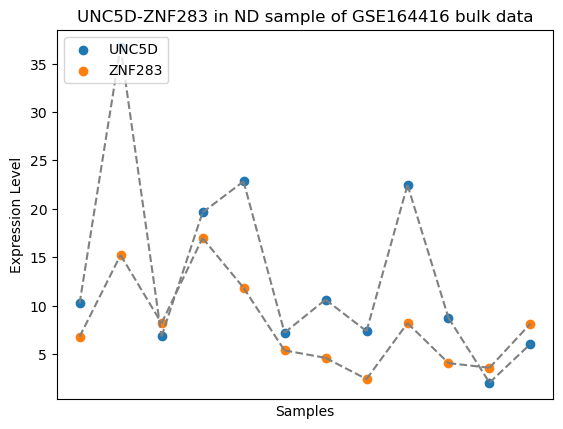

In [12]:
scatter_plot(GSE164416_train.iloc[:,27:],'UNC5D','ZNF283',"UNC5D-ZNF283 in ND sample of GSE164416 bulk data")

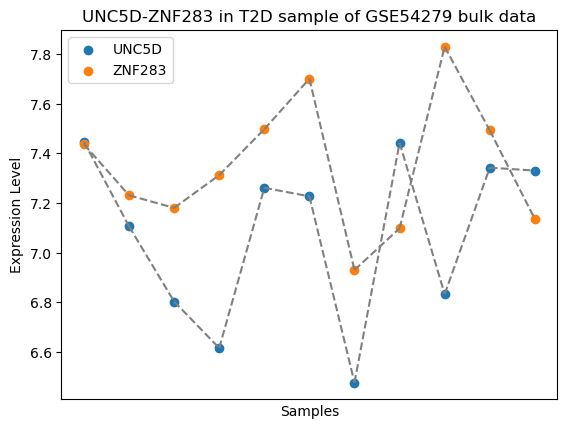

In [13]:
scatter_plot(GSE54279_train.iloc[:,0:11],'UNC5D','ZNF283',"UNC5D-ZNF283 in T2D sample of GSE54279 bulk data")

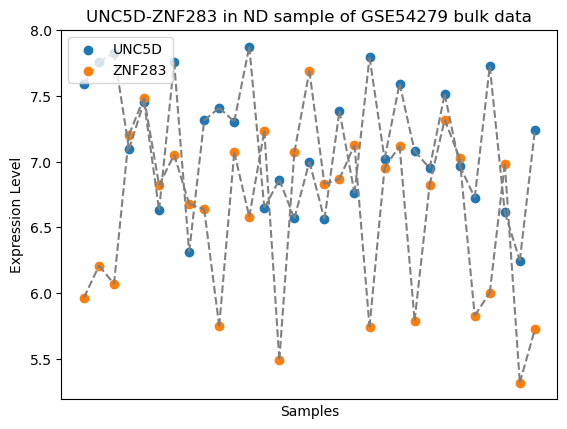

In [14]:
scatter_plot(GSE54279_train.iloc[:,11:],'UNC5D','ZNF283',"UNC5D-ZNF283 in ND sample of GSE54279 bulk data")